
Ortalama Doluluk (FL_B):
Recyclable fraction       Mixed  Non Recyclable  Recyclable
Container Type                                             
Accordion             72.277228       67.252500   70.432432
BIM-3 FTI bottentomd  65.972152       67.048246   66.847222
Cubic                 64.255833       62.517757   70.596875
Diamond               72.493137       67.346429   72.076699
Fiberglass Igloo-a    70.038710       69.402542   70.988288
Fiberglass Igloo-b    69.920339       67.682796   70.989899
Lindstrom City        69.615574       68.836885   67.326496
Lindstrom-a           70.078378       69.047761   67.046774
Lindstrom-b           70.367826       68.072381   67.818681
Malmobehallare        66.712121       66.660000   71.274790
Rectangular           70.910101       66.786179   68.231818
Rectangular Farmland  69.579091       70.021429   68.415315
Silvertop-a           65.208182       65.917925   70.805051
Silvertop-b           67.859821       68.027119   67.405155

Dolma Hızı (F

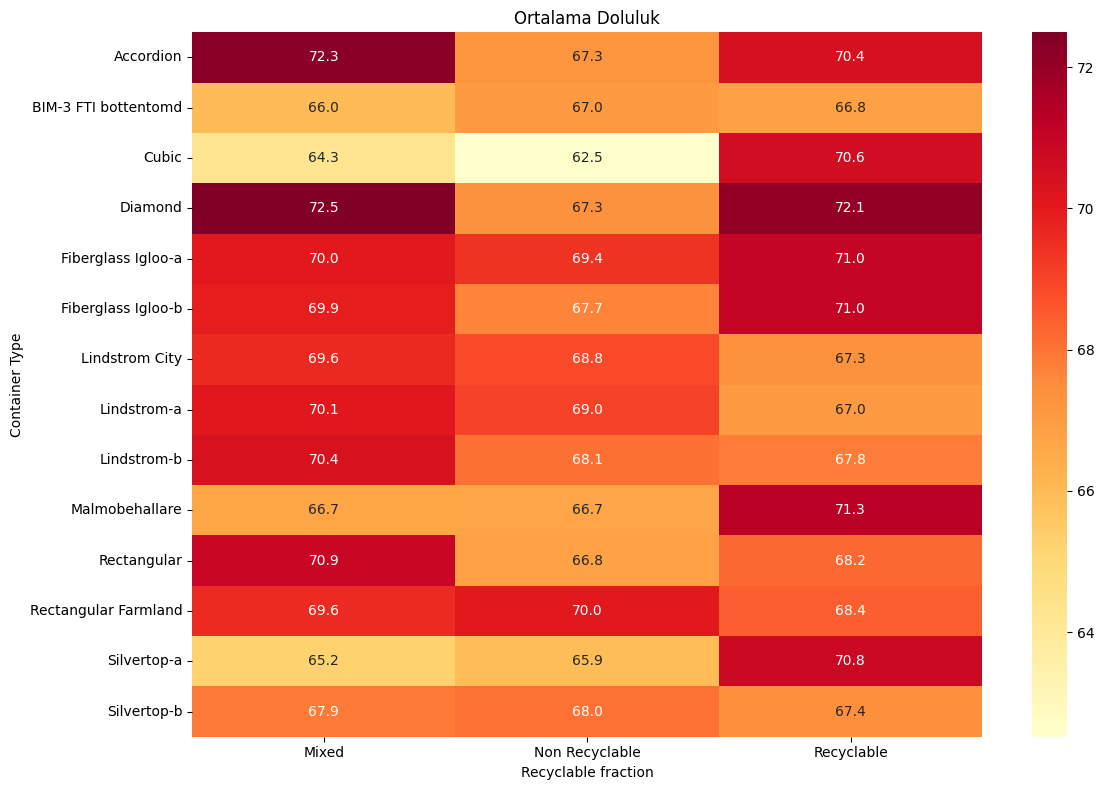

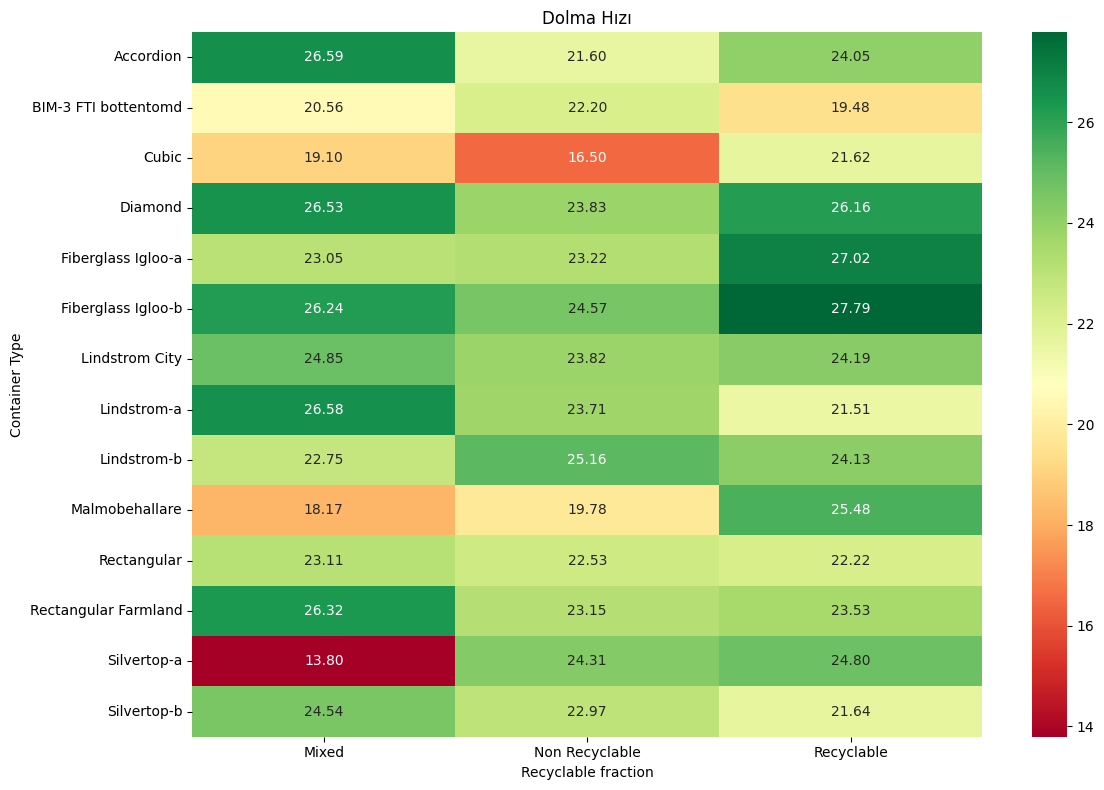

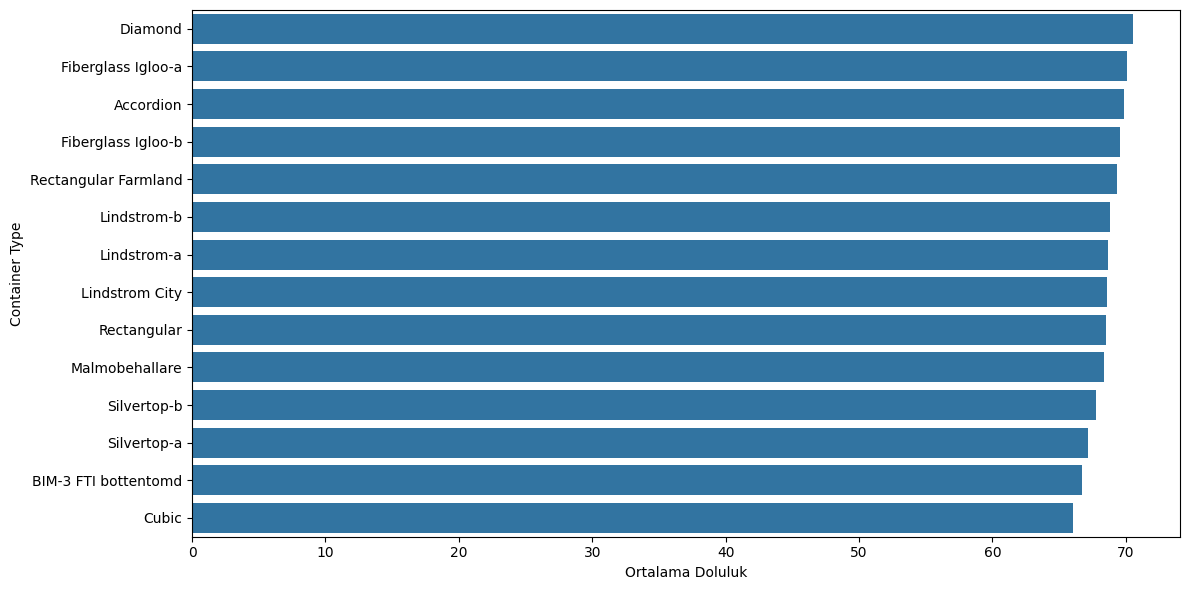


Random Forest
Accuracy: 0.8225108225108225
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       482
           1       0.80      0.83      0.82       442

    accuracy                           0.82       924
   macro avg       0.82      0.82      0.82       924
weighted avg       0.82      0.82      0.82       924



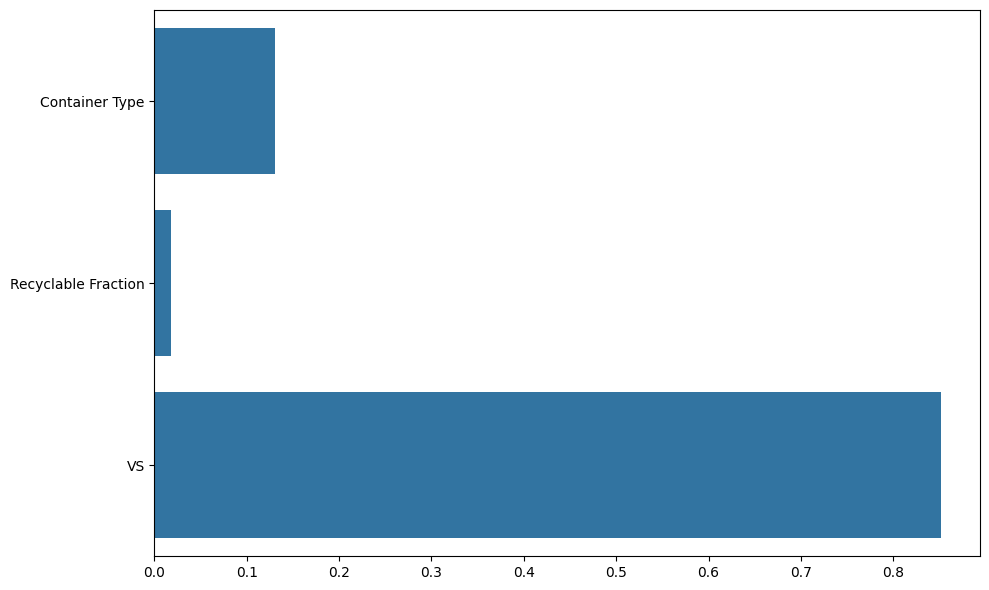


KNN
Accuracy: 0.801948051948052


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Veri yükleme
df = pd.read_csv("Smart_Bin.csv")
df = df.dropna()

# Doluluk artışı
df["Doluluk_Artisi"] = df["FL_B"] - df["FL_A"]

# Pivot tablolar
pivot_doluluk = df.pivot_table(
    index="Container Type",
    columns="Recyclable fraction",
    values="FL_B",
    aggfunc="mean"
)

pivot_hiz = df.pivot_table(
    index="Container Type",
    columns="Recyclable fraction",
    values="Doluluk_Artisi",
    aggfunc="mean"
)

print("\nOrtalama Doluluk (FL_B):")
print(pivot_doluluk)

print("\nDolma Hızı (FL_B - FL_A):")
print(pivot_hiz)

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_doluluk, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Ortalama Doluluk")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_hiz, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Dolma Hızı")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
container_means = df.groupby("Container Type")["FL_B"].mean().sort_values(ascending=False)
sns.barplot(x=container_means.values, y=container_means.index)
plt.xlabel("Ortalama Doluluk")
plt.tight_layout()
plt.show()

# Encoding
le_c = LabelEncoder()
le_w = LabelEncoder()

df["C_Encoded"] = le_c.fit_transform(df["Container Type"])
df["W_Encoded"] = le_w.fit_transform(df["Recyclable fraction"])

# Hedef değişken
median_hiz = df["Doluluk_Artisi"].median()
df["Hizli_Dolma"] = (df["Doluluk_Artisi"] > median_hiz).astype(int)

X = df[["C_Encoded", "W_Encoded", "VS"]]
y = df["Hizli_Dolma"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=rf.feature_importances_,
    y=["Container Type", "Recyclable Fraction", "VS"]
)
plt.tight_layout()
plt.show()

# KNN
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)

y_pred_knn = knn.predict(X_test_s)

print("\nKNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Yeni Bölüm